Imports

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statannotations.Annotator import Annotator

Data loading and conversion

In [36]:
# Data loading
df = pd.read_csv('Similar_compounds_ATP_Rotenone_for_plotting.csv')

df


,Condition,Values,Replicate
0,GC,58.024810,Rep3
1,GC,60.921020,Rep3
2,GC,43.658620,Rep2
3,GC,38.415170,Rep2
4,GC,51.519250,Rep1
5,GC,58.984480,Rep1
6,TRPL,27.849210,Rep3
7,TRPL,20.823760,Rep3
8,TRPL,30.173910,Rep2
9,TRPL,19.824180,Rep2


Plotting    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\jwilb\anaconda3\Lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
c:\Users\jwilb\anaconda3\Lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
c:\Users\jwilb\anaconda3\Lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
c:\Users\jwilb\anaconda3\Lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to s

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GC vs. TRPL: Welch's t-test independent samples, P_val:3.212e-02 t=3.383e+00
GC vs. T1: Welch's t-test independent samples, P_val:3.276e-02 t=3.207e+00
GC vs. T2: Welch's t-test independent samples, P_val:3.088e-01 t=1.207e+00
GC vs. T3: Welch's t-test independent samples, P_val:6.686e-01 t=-4.656e-01
GC vs. T4: Welch's t-test independent samples, P_val:4.082e-01 t=-9.242e-01
GC vs. T5: Welch's t-test independent samples, P_val:4.633e-02 t=3.528e+00
GC vs. T6: Welch's t-test independent samples, P_val:7.333e-01 t=-3.661e-01


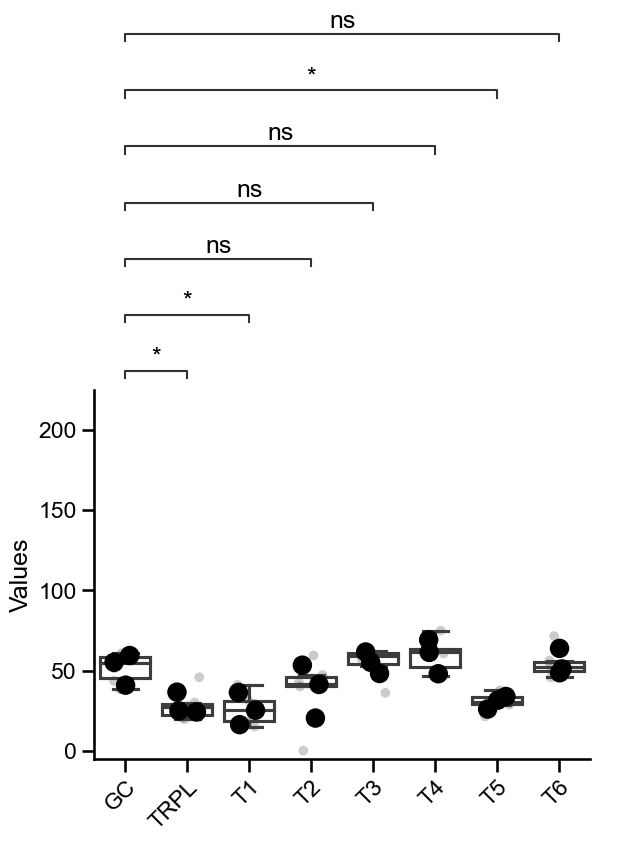

In [37]:
# Plotting parameters
data = df
x = 'Condition'
y = "Values"
y_label = y
replicate = "Replicate"
order = ["GC", "TRPL", "T1", "T2", "T3", "T4", "T5", "T6"]

# Change the global font to Arial
plt.rcParams['font.family'] = 'Arial'

# Plot style
ax = sns.set_context("talk")

# Boxplot
ax = sns.boxplot(x=x, y=y, data=data, width=0.8, 
                  showfliers=False, order=order,
                  zorder=1)  
# Transparancy of boxplot filling color
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))

ax = sns.stripplot(x=x, y=y, data=df, size=7, alpha=0.2, 
                    zorder=0, order=order, jitter=0.2, 
                    dodge=True, color='black')

# Add replicate averages on top of plot
ReplicateAverages = df.groupby([x, replicate], as_index=False).agg({y: "median"})
ReplicateAverages = ReplicateAverages.sort_values([x, replicate]) # Sorting is necessary to plot averages accurately on dataclouds
# Ensure 'Condition' is a categorical type with the specified order
ReplicateAverages['Condition'] = pd.Categorical(ReplicateAverages['Condition'], categories=order, ordered=True)
# Sort the DataFrame based on the categorical order
ReplicateAverages = ReplicateAverages.sort_values('Condition')

ax = sns.stripplot(x=x, y=y, size=12, edgecolor="k", linewidth=2, 
                   data=ReplicateAverages, order=order, jitter=0.2, 
                   dodge=True, color='black')

#Figure aesthetics
ax.set(xlabel=None)
ax.set(ylabel=y_label)
sns.despine()
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
ax.set(ylim=(-5, 225))

# Add statistical annotation on top of figure
stat_pairs=[('GC', 'TRPL'),
            ('GC', 'T1'),
            ('GC', 'T2'),
            ('GC', 'T3'),
            ('GC', 'T4'),
            ('GC', 'T5'),
            ('GC', 'T6')
            ]

annot = Annotator(ax, stat_pairs, data=ReplicateAverages, x=x, y=y)
annot.configure(test='t-test_welch', verbose=2, loc='outside') # t-test_welch
annot.apply_test()
annot.annotate()

# Save plot as PDF
plt.savefig('ATP_Rotenone_similar_compounds' + '.pdf', bbox_inches='tight')

# Show the plot
plt.show()